In [2]:
import chess
import chess.pgn
import time
%matplotlib notebook
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import clear_output
import regex as re
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display
import numpy as np
from ipywidgets import IntSlider
# pd.set_option('display.max_colwidth', 1500)
# pd.set_option('expand_frame_repr', True)
pd.set_option("display.max_rows", 300)
# pd.set_option('max_colwidth',100)

In [2]:
1+10

11

# Biblioteca

### Funções

## Aberturas/Defesas

### Catalã

In [4]:

# pgn = "jogos-gms-lendarios/Fischer.pgn"
pgn = "jogos-aberturas-defesas/catalan/CatalanOpen.pgn"

f = open(pgn)
# f = open("jogos-notaveis/Dubov-Gujrathi-2022-01.pgn")
enx = re.search("(?s)(?<=/)(.*?)(?=\.pgn)",pgn).group()

result = {}
i = 0
while True:
    i += 1
    game = chess.pgn.read_game(f)
    if game is None:
        break

    headers = dict(game.headers)
    # headers["moves"] = game.board().variation_san(game.mainline_moves())
    headers["moves"] = game.board().variation_san(game.mainline_moves())
    listaLances = re.split("\d+\.", headers["moves"])
    listaLances = [x for x in listaLances if x]
    listaLances = [re.sub("^\s","",x) for x in listaLances]
    listaLances = [re.sub("\s$","",x) for x in listaLances]
    listaLances = [i.split(' ') for i in listaLances]
    flat_list = [item for sublist in listaLances for item in sublist]
    headers["lances"] = flat_list
    headers["n_lances"] = len(flat_list)
    
    fens = []
    board = chess.Board()
    for move in headers["lances"]:
        board.push_san(move)
        fen = board.fen()
        fens.append(fen)
       
    inicio = "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR"
    fens.insert(0,inicio)
    headers["fens"] = fens    
    
#     headers["turnos"] = re.findall("\d+\.",headers["moves"])
#     try:
#         headers["turnos"] = headers["turnos"][-1].replace(".","")
#     except:
#         print(f"erro em {i}")
        
    result["Game{}".format(i)] = headers

# cols = df.columns.tolist()
# print(cols)
df = pd.DataFrame(result)
df = df.transpose()
df.insert(loc=0, column='Enxadrista', value=enx)
df = df.reset_index()
df = df.drop('index', axis=1)

# df

tchan = np.where((df['White'].str.contains(enx)) & (df['Result'] == "1-0")|(df['Black'].str.contains(enx)) & (df['Result'] == "0-1"), 'Vitoria', 'Derrota')
df.insert(loc=11, column='Resultado_Enxadrista', value=tchan)

df.loc[df['Result'] == "1/2-1/2", 'Resultado_Enxadrista'] = 'Empate'
    
df['WhiteElo'] = pd.to_numeric(df['WhiteElo'], downcast='float')
df['BlackElo'] = pd.to_numeric(df['BlackElo'], downcast='float')

df.insert(loc=12, column='Diferenca_Rating', value='')
# df['diferenca_rating'] =  np.where((df['White'].str.contains("Anand")) & (df['Result'] == "1-0")|(df['Black'].str.contains("Anand")) & (df['Result'] == "0-1"), 'vitoria', 'derrota')
df.loc[df['White'].str.contains(enx), 'Diferenca_Rating'] = df['WhiteElo'] - df['BlackElo']
df.loc[df['Black'].str.contains(enx), 'Diferenca_Rating'] = df['BlackElo'] - df['WhiteElo']

ratings_22 = pd.read_csv("fide-ratings/2022-JAN.csv", sep="*")
ratings_22 = ratings_22.applymap(lambda x: x.strip() if isinstance(x, str) else x)
nome_colunas = list(ratings_22.columns)
nome_colunas = [x.strip() for x in nome_colunas]
ratings_22.columns = nome_colunas
ratings_22_1 = ratings_22.sort_values(by='JAN22', ascending=False)
select = ratings_22_1.loc[ratings_22_1['Name'].str.contains(enx)]
select = select[:1]
bday = select['B-day'].item()

df['Ano'] = df['Date'].str.findall("^\d{4}").str[0]
df['Ano'] = df['Ano'].fillna(0)
df['Ano'] = pd.to_numeric(df["Ano"])
df['Idade'] = df['Ano'] - bday

df = df[['Enxadrista','Idade','Ano', 'Event', 'Site', 'White','WhiteElo', 'Black','BlackElo',"Diferenca_Rating","Resultado_Enxadrista", 'Result','n_lances','ECO','moves','lances', 'fens','Date','Round']]

df_lista = df.values.tolist()

x_widget = IntSlider(min=0, max=len(df_lista))
y_widget = IntSlider(min=0,max=250)

def tabulero(Partida, Lance):
    board = chess.Board(df_lista[Partida][16][Lance])
    print(f"\n            {df_lista[Partida][0]} - {df_lista[Partida][1]} anos \n        Diferenca de {df_lista[Partida][9]} de rating - {df_lista[Partida][10]}\n")
    display(board)
    print(f"\n{df_lista[Partida][5]} ({df_lista[Partida][6]}) x {df_lista[Partida][7]} ({df_lista[Partida][8]}) \n {df_lista[Partida][3]} - {df_lista[Partida][4]} - {df_lista[Partida][2]} - {df_lista[Partida][12]} lances")
    return
    
interact(tabulero,Partida=x_widget, Lance=y_widget);

# display(y_widget)

# percentual = round(df['Resultado_Enxadrista'].value_counts(normalize=True)*100,2)
# numero = df['Resultado_Enxadrista'].value_counts()
# numero


ValueError: can only convert an array of size 1 to a Python scalar

## Jogos Notáveis

### A imortal da defesa

### A fuzarca das rainhas

### A locomotiva brasileira

In [ ]:
## Super GMs da atualidade

### O insuperável norueguês, cinco vezes campeão mundial, rumo aos 2900 de rating, Magnus Carlsen

In [ ]:
## GMs Lendarios

# FIDE Ratings

In [77]:
ratings_22 = pd.read_csv("fide-ratings/2022-JAN.csv", sep="*")
ratings_22 = ratings_22.applymap(lambda x: x.strip() if isinstance(x, str) else x)
nome_colunas = list(ratings_22.columns)
nome_colunas = [x.strip() for x in nome_colunas]
ratings_22.columns = nome_colunas
ratings_22_1 = ratings_22.sort_values(by='JAN22', ascending=False)

In [6]:
ratings_22_1.head(100)

,ID_NUMBER,Name,Fed,Sex,Tit,WTit,OTit,FOA,JAN22,Gms,K,B-day,Flag
54754,1503014,"Carlsen, Magnus",NOR,M,GM,,,,2865,11,10,1990,
158483,4100018,"Kasparov, Garry",RUS,M,GM,,,,2812,0,10,1963,i
100103,12573981,"Firouzja, Alireza",FRA,M,GM,,,,2804,0,10,2003,
81544,8603677,"Ding, Liren",CHN,M,GM,,,,2799,0,10,1992,
55481,2020009,"Caruana, Fabiano",USA,M,GM,,,,2792,0,10,1992,
234683,4168119,"Nepomniachtchi, Ian",RUS,M,GM,,,,2773,11,10,1990,
114281,24116068,"Giri, Anish",NED,M,GM,,,,2772,0,10,1994,
19581,13300474,"Aronian, Levon",USA,M,GM,,,,2772,0,10,1982,
318511,5202213,"So, Wesley",USA,M,GM,,,,2772,0,10,1993,
201139,13401319,"Mamedyarov, Shakhriyar",AZE,M,GM,,,,2767,0,10,1985,


In [4]:
ratings_21 = pd.read_csv("fide-ratings/2021-JAN.csv", sep="*")
ratings_21 = ratings_21.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# ratings_21_1 = ratings_21.sort_values(by='JAN21', ascending=False)
ratings_21_1 = ratings_21.sort_values(by='JAN21', ascending=False)

In [12]:
ratings_22_2 = ratings_22_1[(ratings_22_1["Flag"].str.len() < 1)]

@interact
def show_rating(column='JAN22', x=(0,2900)):
    return ratings_22_2.loc[ratings_22_2[column] > x]

interactive(children=(Text(value='JAN22', description='column'), IntSlider(value=1450, description='x', max=29…

In [228]:
@interact
def show_articles_more_than(column=['B-day', 'JAN22', 'ID_NUMBER'], 
                            x=(10, 100000, 10)):
    return ratings_22_2.loc[ratings_22_2[column] > x]

interactive(children=(Dropdown(description='column', options=('B-day', 'JAN22', 'ID_NUMBER     '), value='B-da…

In [5]:
@interact
def correlations(column1= list(ratings_22_1.select_dtypes('number').columns),
                 column2= list(ratings_21_1.select_dtypes('number').columns)):
    print(f"Correlation: {ratings_22_1[column1].corr(ratings_21_1[column2])}")

interactive(children=(Dropdown(description='column1', options=('ID_NUMBER     ', 'JAN22', 'Gms', 'K ', 'B-day'…

In [ ]:
# def show_stats_by_tag(tag):
#     return(df.groupby(f'<tag>{tag}').describe()[['views', 'reads']])
    
# stats = interact(show_stats_by_tag,
#                 tag=widgets.Dropdown(options=['Towards Data Science', 'Education', 
#                                               'Machine Learning', 'Python', 'Data Science']))

# Recursos PGNs

## Fazer animacao com PGN de partida unica

In [ ]:
InteractiveShell.ast_node_interactivity = "all"

pgn = open("jogos-gms-lendarios/Anand.pgn")

first_game = chess.pgn.read_game(pgn)
# second_game = chess.pgn.read_game(pgn)

# first_game.headers["Event"]

# Iterate through all moves and play them on a board.
board = first_game.board()
for move in first_game.mainline_moves():
    board.push(move)
    print(move)
    time.sleep(1)
    clear_output(wait=True)
    board

## Funcao para controlar PGN de partida unica

In [65]:
# f = open("jogos-gms-lendarios/Anand.pgn")
f = open("jogos-notaveis/Dubov-Gujrathi-2022-01.pgn")

result = {}
i = 0
while True:
    i += 1
    game = chess.pgn.read_game(f)
    if game is None:
        break


    headers = dict(game.headers)
    # headers["moves"] = game.board().variation_san(game.mainline_moves())
    headers["moves"] = game.board().variation_san(game.mainline_moves())
    listaLances = re.split("\d+\.", headers["moves"])
    listaLances = [x for x in listaLances if x]
    listaLances = [re.sub("^\s","",x) for x in listaLances]
    listaLances = [re.sub("\s$","",x) for x in listaLances]
    listaLances = [i.split(' ') for i in listaLances]
    flat_list = [item for sublist in listaLances for item in sublist]
    headers["lances"] = flat_list
    
    fens = []
    board = chess.Board()
    for move in headers["lances"]:
        board.push_san(move)
        fen = board.fen()
        fens.append(fen)
        
    headers["fens"] = fens    
    
    headers["turnos"] = re.findall("\d+\.",headers["moves"])
    try:
        headers["turnos"] = headers["turnos"][-1].replace(".","")
    except:
        print(f"erro em {i}")
        
    result["Game{}".format(i)] = headers
    

@interact(x=(0,len(headers["fens"])))
def g(x=0):
    # print(f"esseee {y}")
    # board.push_san(headers["lances"][x])
    board = chess.Board(headers["fens"][x])
    display(board)
    return

interactive(children=(IntSlider(value=0, description='x', max=74), Output()), _dom_classes=('widget-interact',…

## Extrair dados de PGNs com varias partidas

In [3]:

# pgn = "jogos-gms-lendarios/Fischer.pgn"
pgn = "jogos-super-gms-2022/Carlsen.pgn"

f = open(pgn)
# f = open("jogos-notaveis/Dubov-Gujrathi-2022-01.pgn")
enx = re.search("(?s)(?<=/)(.*?)(?=\.pgn)",pgn).group()

result = {}
i = 0
while True:
    i += 1
    game = chess.pgn.read_game(f)
    if game is None:
        break

    headers = dict(game.headers)
    # headers["moves"] = game.board().variation_san(game.mainline_moves())
    headers["moves"] = game.board().variation_san(game.mainline_moves())
    listaLances = re.split("\d+\.", headers["moves"])
    listaLances = [x for x in listaLances if x]
    listaLances = [re.sub("^\s","",x) for x in listaLances]
    listaLances = [re.sub("\s$","",x) for x in listaLances]
    listaLances = [i.split(' ') for i in listaLances]
    flat_list = [item for sublist in listaLances for item in sublist]
    headers["lances"] = flat_list
    headers["n_lances"] = len(flat_list)
    
    fens = []
    board = chess.Board()
    for move in headers["lances"]:
        board.push_san(move)
        fen = board.fen()
        fens.append(fen)
       
    inicio = "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR"
    fens.insert(0,inicio)
    headers["fens"] = fens    
    
#     headers["turnos"] = re.findall("\d+\.",headers["moves"])
#     try:
#         headers["turnos"] = headers["turnos"][-1].replace(".","")
#     except:
#         print(f"erro em {i}")
        
    result["Game{}".format(i)] = headers

# cols = df.columns.tolist()
# print(cols)
df = pd.DataFrame(result)
df = df.transpose()
df.insert(loc=0, column='Enxadrista', value=enx)
df = df.reset_index()
df = df.drop('index', axis=1)

# df

tchan = np.where((df['White'].str.contains(enx)) & (df['Result'] == "1-0")|(df['Black'].str.contains(enx)) & (df['Result'] == "0-1"), 'Vitoria', 'Derrota')
df.insert(loc=11, column='Resultado_Enxadrista', value=tchan)

df.loc[df['Result'] == "1/2-1/2", 'Resultado_Enxadrista'] = 'Empate'
    
df['WhiteElo'] = pd.to_numeric(df['WhiteElo'], downcast='float')
df['BlackElo'] = pd.to_numeric(df['BlackElo'], downcast='float')

df.insert(loc=12, column='Diferenca_Rating', value='')
# df['diferenca_rating'] =  np.where((df['White'].str.contains("Anand")) & (df['Result'] == "1-0")|(df['Black'].str.contains("Anand")) & (df['Result'] == "0-1"), 'vitoria', 'derrota')
df.loc[df['White'].str.contains(enx), 'Diferenca_Rating'] = df['WhiteElo'] - df['BlackElo']
df.loc[df['Black'].str.contains(enx), 'Diferenca_Rating'] = df['BlackElo'] - df['WhiteElo']

ratings_22 = pd.read_csv("fide-ratings/2022-JAN.csv", sep="*")
ratings_22 = ratings_22.applymap(lambda x: x.strip() if isinstance(x, str) else x)
nome_colunas = list(ratings_22.columns)
nome_colunas = [x.strip() for x in nome_colunas]
ratings_22.columns = nome_colunas
ratings_22_1 = ratings_22.sort_values(by='JAN22', ascending=False)
select = ratings_22_1.loc[ratings_22_1['Name'].str.contains(enx)]
select = select[:1]
bday = select['B-day'].item()

df['Ano'] = df['Date'].str.findall("^\d{4}").str[0]
df['Ano'] = df['Ano'].fillna(0)
df['Ano'] = pd.to_numeric(df["Ano"])
df['Idade'] = df['Ano'] - bday

df = df[['Enxadrista','Idade','Ano', 'Event', 'Site', 'White','WhiteElo', 'Black','BlackElo',"Diferenca_Rating","Resultado_Enxadrista", 'Result','n_lances','ECO','moves','lances', 'fens','Date','Round']]

df_lista = df.values.tolist()

x_widget = IntSlider(min=0, max=len(df_lista))
y_widget = IntSlider(min=0,max=250)

def tabulero(Partida, Lance):
    board = chess.Board(df_lista[Partida][16][Lance])
    print(f"\n            {df_lista[Partida][0]} - {df_lista[Partida][1]} anos \n        Diferenca de {df_lista[Partida][9]} de rating - {df_lista[Partida][10]}\n")
    display(board)
    print(f"\n{df_lista[Partida][5]} ({df_lista[Partida][6]}) x {df_lista[Partida][7]} ({df_lista[Partida][8]}) \n {df_lista[Partida][3]} - {df_lista[Partida][4]} - {df_lista[Partida][2]} - {df_lista[Partida][12]} lances")
    return
    
interact(tabulero,Partida=x_widget, Lance=y_widget);

# display(y_widget)

# percentual = round(df['Resultado_Enxadrista'].value_counts(normalize=True)*100,2)
# numero = df['Resultado_Enxadrista'].value_counts()
# numero


interactive(children=(IntSlider(value=0, description='Partida', max=4089), IntSlider(value=0, description='Lan…

In [ ]:
x_widget = IntSlider(min=0, max=len(df_lista))
y_widget = IntSlider(min=0,max=250)

def tabulero(Partida, Lance):
    board = chess.Board(df_lista[Partida][16][Lance])
    print(f"\n            {df_lista[Partida][0]} - {df_lista[Partida][1]} anos \n        Diferenca de {df_lista[Partida][9]} de rating - {df_lista[Partida][10]}\n")
    display(board)
    print(f"\n{df_lista[Partida][5]} ({df_lista[Partida][6]}) x {df_lista[Partida][7]} ({df_lista[Partida][8]}) \n {df_lista[Partida][3]} - {df_lista[Partida][4]} - {df_lista[Partida][2]} - {df_lista[Partida][12]} lances")
    return
    
interact(tabulero,Partida=x_widget, Lance=y_widget);

interactive(children=(IntSlider(value=0, description='Partida', max=3966), IntSlider(value=0, description='Lan…

## Fazer animacao com lista de lances

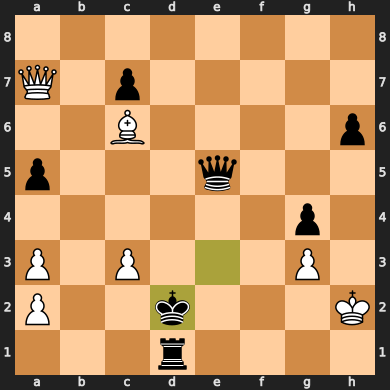

In [196]:
InteractiveShell.ast_node_interactivity = 'last_expr'

board = chess.Board()

for move in headers["lances"]:
    board.push_san(move)
    time.sleep(1)
    clear_output(wait=True)
    board 

## PGN Slider

In [108]:
from IPython.display import display

board = chess.Board()
fens = []

for move in headers["lances"]:
    board.push_san(move)
    fen = board.fen()
    fens.append(fen)
    
@interact(x=(0,len(fens)))
def g(x=0):
    # print(f"esseee {y}")
    # board.push_san(headers["lances"][x])
    board = chess.Board(fens[x])
    display(board)
    return

interactive(children=(IntSlider(value=0, description='x', max=74), Output()), _dom_classes=('widget-interact',…

# MSC

In [115]:
import chess.pgn

f = open("jogos-gms-lendarios/Anand.pgn")

my_list = []

while True:
    game = chess.pgn.read_game(f)
    if game is None:
        break  # end of file

    my_list.append(game)
    


In [119]:
import chess.pgn

f = open("jogos-gms-lendarios/Anand.pgn")

lista = []

result = {}
i = 0
while True:
    i += 1
    game = chess.pgn.read_game(f)
    if game is None:
        break

    headers = dict(game.headers)
    headers["moves"] = game.board().variation_san(game.mainline_moves())

    result["Game{}".format(i)] = headers

headers    

{'Event': '7th Gashimov Mem Blitz',
 'Site': 'Baku AZE',
 'Date': '2021.12.23',
 'Round': '14.4',
 'White': 'Anand,V',
 'Black': 'Asadli,Vugar',
 'Result': '1/2-1/2',
 'BlackElo': '2579',
 'ECO': 'B15',
 'WhiteElo': '2751',
 'moves': '1. e4 c6 2. d4 d5 3. Nc3 dxe4 4. Nxe4 Nf6 5. Nxf6+ exf6 6. c3 Bd6 7. Bd3 O-O 8. Qc2 Re8+ 9. Be3 h5 10. Ne2 Nd7 11. O-O h4 12. h3 Nf8 13. Rfe1 Be6 14. Bf4 Rc8 15. Rad1 Qc7 16. Bxd6 Qxd6 17. c4 Re7 18. Nc3 Rce8 19. d5 cxd5 20. cxd5 Bd7 21. Rxe7 Rxe7 22. Qb3 Ng6 23. Bxg6 fxg6 24. Qc4 g5 25. Ne4 Qf4 26. d6+ Re6 27. Qc7 Rxe4 28. Qxd7 Re2 29. Rf1 Rd2 30. Qxb7 Qxd6 31. Qxa7 Rxb2 32. a4 Ra2 33. Re1 Qd2 34. Rf1'}

In [ ]:
import ipywidgets as widgets

upbutton = widgets.Button(description='Up')
downbutton = widgets.Button(description='Down')
out = widgets.Output()

count = [0]
@interact
def up_button_clicked(_,incr=1):
    with out:
        count[0] += incr
        samp_text = str(incr) + "count" + str(count)
        print(samp_text)
        
upbutton.on_click(up_button_clicked)

def down_button_clicked(_):
    return up_button_clicked(_,-1)

downbutton.on_click(down_button_clicked)

In [56]:
import asyncio

from IPython.display import display
import ipywidgets as widgets


out = widgets.Output()

def wait_for_click(btn, n_clicked=0):
    future = asyncio.Future()
    
    def on_button_clicked(btn):
        btn.description = f"Clicked {n_clicked} times!"
        future.set_result(btn.description)
    
    btn.on_click(on_button_clicked)
    
    return future


n_changes = 5

btn = widgets.Button(description="Never Clicked")


async def f():
    for i in range(n_changes):
        out.append_stdout(f'did work {i}\n')
        btn_descr = await wait_for_click(btn, n_clicked=i + 1)
        out.append_stdout(f'\nasync function continued with button description "{btn_descr}"\n')
asyncio.ensure_future(f())

display(btn, out)

<Task pending name='Task-4' coro=<f() running at C:\Users\loren\AppData\Local\Temp/ipykernel_3488/1267066275.py:26>>

Button(description='Never Clicked', style=ButtonStyle())

Output()

In [14]:
# f = open("jogos-gms-lendarios/Anand.pgn")
f = open("jogos-notaveis/Dubov-Gujrathi-2022-01.pgn")

result = {}
i = 0
while True:
    i += 1
    game = chess.pgn.read_game(f)
    if game is None:
        break


    headers = dict(game.headers)
    # headers["moves"] = game.board().variation_san(game.mainline_moves())
    headers["moves"] = game.board().variation_san(game.mainline_moves())
    listaLances = re.split("\d+\.", headers["moves"])
    listaLances = [x for x in listaLances if x]
    listaLances = [re.sub("^\s","",x) for x in listaLances]
    listaLances = [re.sub("\s$","",x) for x in listaLances]
    listaLances = [i.split(' ') for i in listaLances]
    flat_list = [item for sublist in listaLances for item in sublist]
    headers["lances"] = flat_list
    
    headers["turnos"] = re.findall("\d+\.",headers["moves"])
    headers["turnos"] = headers["turnos"][-1].replace(".","")

    result["Game{}".format(i)] = headers
    
    
# \d+\.
# type(headers['moves'])   
# result

In [108]:
from IPython.display import display

board = chess.Board()
fens = []

for move in headers["lances"]:
    board.push_san(move)
    fen = board.fen()
    fens.append(fen)
    
@interact(x=(0,len(fens)))
def g(x=0):
    # print(f"esseee {y}")
    # board.push_san(headers["lances"][x])
    board = chess.Board(fens[x])
    display(board)
    return

interactive(children=(IntSlider(value=0, description='x', max=74), Output()), _dom_classes=('widget-interact',…